# Deep Learning with OpenCV

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import argparse
import sys

import os.path


In [2]:
img = cv2.imread('devon.jpg')
img.shape


(360, 480, 3)

In [3]:
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
b = img[:,:,0]
print(b)
g = img[:,:,1]
r = img[:,:,2]

cv2.imshow('Blue', b)
cv2.imshow('Green', g)
cv2.imshow('Red', r)
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[209 209 210 ... 229 227 225]
 [212 212 212 ... 228 227 227]
 [213 213 213 ... 226 226 227]
 ...
 [ 15  18  17 ...  58  89 109]
 [ 18  22  23 ...  52  95 139]
 [ 37  42  30 ...  40  81 139]]


In [5]:
cap = cv2.VideoCapture('shore.mov')

if cap.isOpened() == False:
    print('Cannot open file or video stream')

while True:
    ret, frame = cap.read()

    if ret == True:
        cv2.imshow('Frame', frame)

        if cv2.waitKey(25) & 0xFF == 27:
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


In [6]:
img = cv2.imread('typewriter.jpg')
#print(img.shape)

all_rows = open('synset_words.txt').read().strip().split("\n")

classes = [r[r.find(' ') + 1:] for r in all_rows]

for (i,c) in enumerate(classes):
    if i==4:
        break
    print(i,c)

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


0 tench, Tinca tinca
1 goldfish, Carassius auratus
2 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
3 tiger shark, Galeocerdo cuvieri


In [7]:
img = cv2.imread('typewriter.jpg')
#print(img.shape)

all_rows = open('synset_words.txt').read().strip().split("\n")

classes = [r[r.find(' ') + 1:] for r in all_rows]

net = cv2.dnn.readNetFromCaffe('bvlc_googlenet.prototxt','bvlc_googlenet.caffemodel')

blob = cv2.dnn.blobFromImage(img, 1, (224,224))

net.setInput(blob)

outp = net.forward()
#print(outp)
idx = np.argsort(outp[0])[::-1][:5]

for (i,id) in enumerate(idx):
    print('{}. {} ({}): Probability {:.3}%'.format(i+1, classes[id], id, outp[0][id]*100))
#for (i,c) in enumerate(classes):
#    if i==4:
#        break
#    print(i,c)

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1. typewriter keyboard (878): Probability 85.4%
2. space bar (810): Probability 5.45%
3. radiator (753): Probability 2.01%
4. switch, electric switch, electrical switch (844): Probability 0.888%
5. stove (827): Probability 0.873%


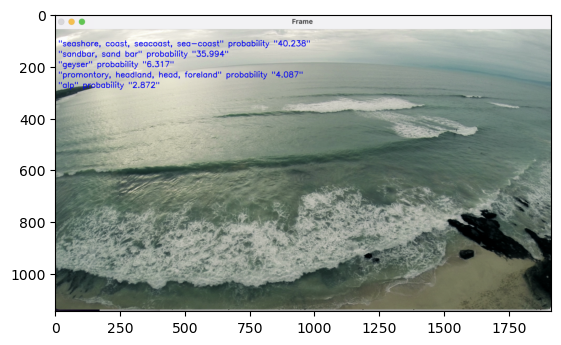

In [8]:
# Read Images
img = mpimg.imread('Screenshot.png')
 
# Output Images
plt.imshow(img)


In [ ]:
cap = cv2.VideoCapture('shore.mov')

all_rows = open('synset_words.txt').read().strip().split("\n")

classes = [r[r.find(' ') + 1:] for r in all_rows]

net = cv2.dnn.readNetFromCaffe('bvlc_googlenet.prototxt','bvlc_googlenet.caffemodel')

if cap.isOpened() == False:
    print('Cannot open file or video stream')

while True:
    ret, frame = cap.read()
    
    blob = cv2.dnn.blobFromImage(frame, 1, (224,224))

    net.setInput(blob)

    outp = net.forward()

    r=1
    for i in np.argsort(outp[0])[::-1][:5]:
        txt = ' "%s" probability "%.3f" ' % (classes[i], outp[0][i] * 100)
        cv2.putText(frame, txt, (0, 25 + 40*r), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        r+=1

    if ret == True:
        cv2.imshow('Frame', frame)

        if cv2.waitKey(25) & 0xFF == 27:
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()
